# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
train = loadmat('/content/drive/MyDrive/train_32x32.mat')
test = loadmat('/content/drive/MyDrive/test_32x32.mat')

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
x_train, y_train = train['X'], train['y']
x_test, y_test = test['X'], test['y']

In [5]:
def changing_axes(data):
    x_train_accurate = np.swapaxes(data, 2, 3)
    x_train_accurate = np.swapaxes(x_train_accurate, 1, 2)
    x_train_accurate = np.swapaxes(x_train_accurate, 0, 1)
    return x_train_accurate

In [6]:
x_train = changing_axes(x_train) / 255.
x_test = changing_axes(x_test) / 255.

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

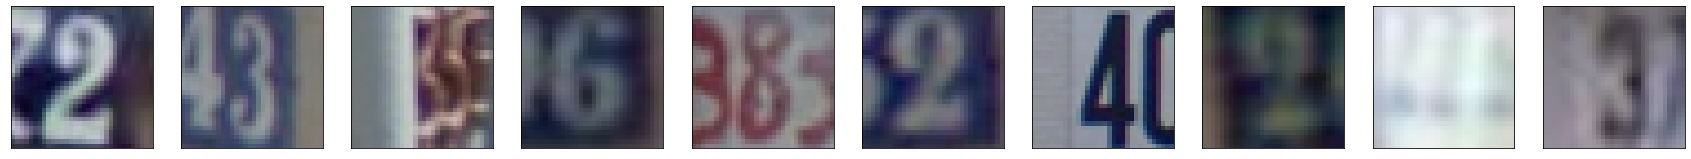

In [7]:
random_img_numbers = np.random.randint(0, 73257, 10)
random_images = x_train[random_img_numbers]

fig, ax = plt.subplots(1, 10)
fig.set_figheight(30)
fig.set_figwidth(30)

for ind in range(10):
    ax[ind].imshow(random_images[ind])
    ax[ind].axes.xaxis.set_visible(False)
    ax[ind].axes.yaxis.set_visible(False)

In [8]:
x_train = np.mean(x_train, axis=3)
x_test = np.mean(x_test , axis=3)

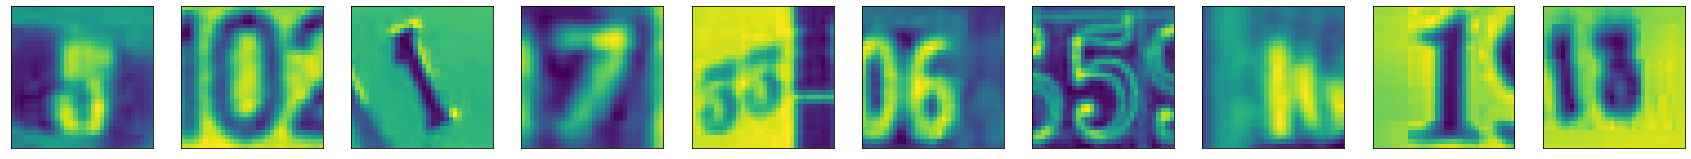

In [9]:
random_img_numbers = np.random.randint(0, 73257, 10)
random_images = x_train[random_img_numbers]

fig, ax = plt.subplots(1, 10)
fig.set_figheight(30)
fig.set_figwidth(30)

for ind in range(10):
    ax[ind].imshow(random_images[ind])
    ax[ind].axes.xaxis.set_visible(False)
    ax[ind].axes.yaxis.set_visible(False)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [11]:
def get_model(input_shape):
    
    model = Sequential([
        Flatten(input_shape=input_shape),
        
        Dense(1024, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        Dense(512, activation='relu'),
        
        Dense(11, activation='softmax')
        
        
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['acc']
    )
    
    return model

In [12]:
model = get_model(x_train[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 11)                5643      
                                                                 
Total params: 2,105,355
Trainable params: 2,105,355
Non-

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

def get_checkpoint_callback():
    
    return ModelCheckpoint(
        'model_checkpoint_mlp/best_weights',
        save_weights_only=True,
        save_best_only=True,
        monitor='val_acc',
        save_freq='epoch',
        verbose=1
    
    )

def get_lr_plato():
    
    return ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.8,
        patience=5,
        min_delta=0.001,
        min_lr=0.00001,
        verbose=1
    )
    

In [14]:
checkpoint = get_checkpoint_callback()
lr_reduce = get_lr_plato()
epochs_number = 30


history = model.fit(
    x_train,
    y_train,
    epochs=epochs_number,
    batch_size=1024,
    validation_split=0.15,
    callbacks=[checkpoint, lr_reduce]
)

Epoch 1/30
58/61 [===========================>..] - ETA: 0s - loss: 2.2431 - acc: 0.1900
Epoch 1: val_acc improved from -inf to 0.21722, saving model to model_checkpoint_mlp/best_weights
61/61 [==============================] - 2s 17ms/step - loss: 2.2408 - acc: 0.1918 - val_loss: 2.1949 - val_acc: 0.2172 - lr: 1.0000e-04
Epoch 2/30
58/61 [===========================>..] - ETA: 0s - loss: 2.0847 - acc: 0.2682
Epoch 2: val_acc improved from 0.21722 to 0.34698, saving model to model_checkpoint_mlp/best_weights
61/61 [==============================] - 1s 9ms/step - loss: 2.0769 - acc: 0.2725 - val_loss: 1.9030 - val_acc: 0.3470 - lr: 1.0000e-04
Epoch 3/30
60/61 [============================>.] - ETA: 0s - loss: 1.7033 - acc: 0.4373
Epoch 3: val_acc improved from 0.34698 to 0.50523, saving model to model_checkpoint_mlp/best_weights
61/61 [==============================] - 1s 9ms/step - loss: 1.7009 - acc: 0.4383 - val_loss: 1.5437 - val_acc: 0.5052 - lr: 1.0000e-04
Epoch 4/30
60/61 [======

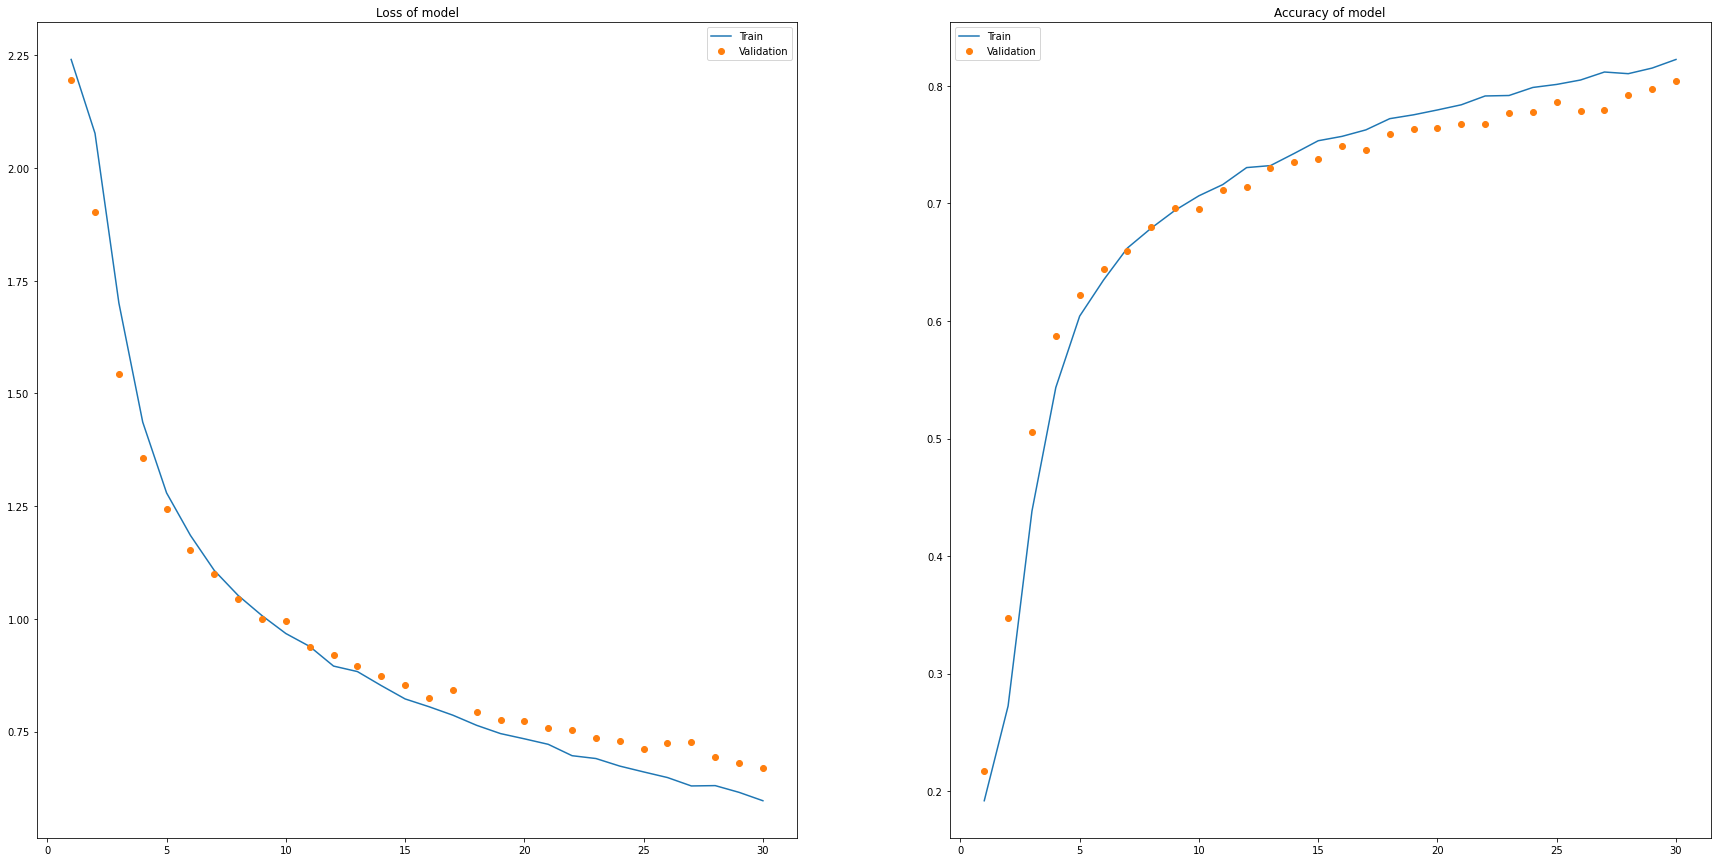

In [15]:
history_dict = history.history

epochs = [i for i in range(1, epochs_number+1)]
fig, ax = plt.subplots(1, 2)

fig.set_figheight(15)
fig.set_figwidth(30)

ax[0].set_title("Loss of model")
ax[0].plot(epochs, history_dict['loss'], label='Train')
ax[0].plot(epochs, history_dict['val_loss'], 'o', label='Validation')
ax[0].legend()


ax[1].set_title("Accuracy of model")
ax[1].plot(epochs, history_dict['acc'], label='Train')
ax[1].plot(epochs, history_dict['val_acc'], 'o', label='Validation')
ax[1].legend()
plt.show()

In [16]:
model.evaluate(x_test, y_test, verbose=2)

814/814 - 2s - loss: 0.7424 - acc: 0.7874 - 2s/epoch - 2ms/step


[0.7424184083938599, 0.7873770594596863]

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [17]:
def get_cnn_model(input_shape):
    
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(),
        BatchNormalization(),
        
        Conv2D(64, (3, 3),  activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        MaxPooling2D(),
        BatchNormalization(),
        
        Flatten(),
        Dropout(0.5),
        
        Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        BatchNormalization(),
        Dense(11, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['acc']
    )
    
    return model

In [18]:
model = get_cnn_model((32, 32, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [19]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

In [20]:
def get_checkpoint_callback_CNN():
    
    return ModelCheckpoint(
        'model_checkpoint_cnn/best_weights',
        save_weights_only=True,
        save_best_only=True,
        monitor='val_acc',
        save_freq='epoch',
        verbose=1
    
    )

def get_lr_plato_CNN():
    
    return ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.7,
        patience=3,
        min_delta=0.01,
        min_lr=0.00001,
        verbose=1
    )
    

In [21]:
checkpoint_cnn = get_checkpoint_callback_CNN()
lr_reduce_cnn = get_lr_plato_CNN()

In [22]:
epoch_number = 30

history = model.fit(
    x_train,
    y_train,
    epochs=epoch_number,
    batch_size=128,
    validation_split=0.2,
    callbacks=[checkpoint_cnn, lr_reduce_cnn]

)

Epoch 1/30
458/458 [==============================] - ETA: 0s - loss: 2.0199 - acc: 0.4516
Epoch 1: val_acc improved from -inf to 0.50874, saving model to model_checkpoint_cnn/best_weights
458/458 [==============================] - 8s 10ms/step - loss: 2.0199 - acc: 0.4516 - val_loss: 1.8433 - val_acc: 0.5087 - lr: 1.0000e-04
Epoch 2/30
455/458 [============================>.] - ETA: 0s - loss: 1.1108 - acc: 0.7536
Epoch 2: val_acc improved from 0.50874 to 0.82883, saving model to model_checkpoint_cnn/best_weights
458/458 [==============================] - 4s 9ms/step - loss: 1.1094 - acc: 0.7538 - val_loss: 0.8883 - val_acc: 0.8288 - lr: 1.0000e-04
Epoch 3/30
456/458 [============================>.] - ETA: 0s - loss: 0.9183 - acc: 0.8070
Epoch 3: val_acc improved from 0.82883 to 0.84896, saving model to model_checkpoint_cnn/best_weights
458/458 [==============================] - 4s 10ms/step - loss: 0.9179 - acc: 0.8071 - val_loss: 0.7967 - val_acc: 0.8490 - lr: 1.0000e-04
Epoch 4/30


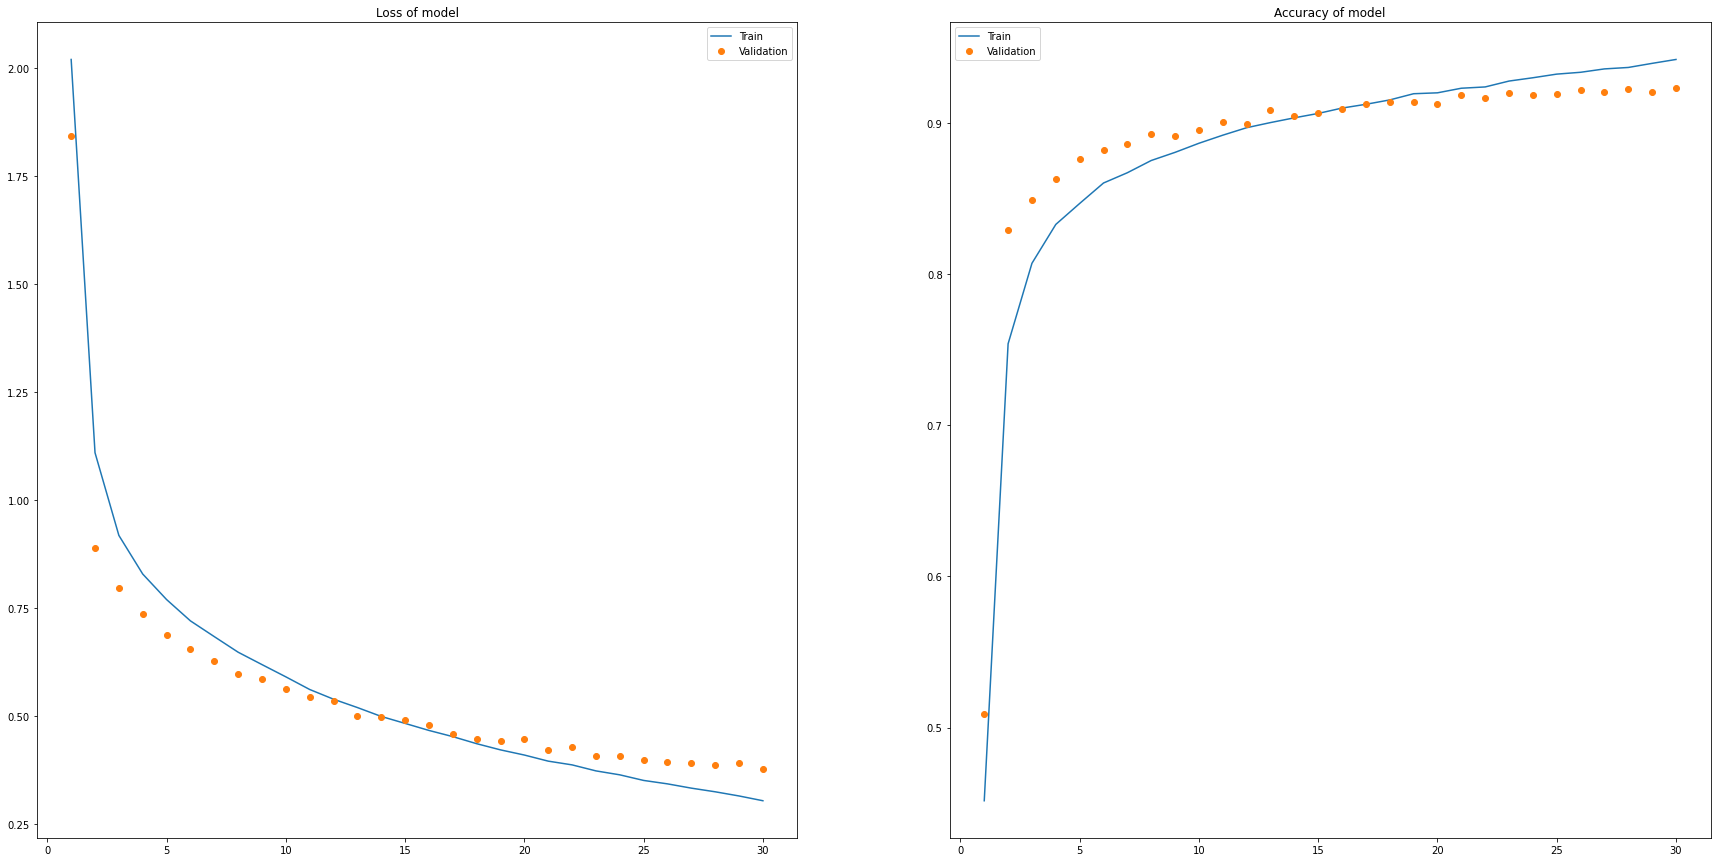

In [23]:
history_dict = history.history

epochs = [i for i in range(1, epoch_number+1)]
fig, ax = plt.subplots(1, 2)

fig.set_figheight(15)
fig.set_figwidth(30)

ax[0].set_title("Loss of model")
ax[0].plot(epochs, history_dict['loss'], label='Train')
ax[0].plot(epochs, history_dict['val_loss'], 'o', label='Validation')
ax[0].legend()


ax[1].set_title("Accuracy of model")
ax[1].plot(epochs, history_dict['acc'], label='Train')
ax[1].plot(epochs, history_dict['val_acc'], 'o', label='Validation')
ax[1].legend()
plt.show()

In [24]:
model.evaluate(x_test, y_test)

814/814 [==============================] - 3s 3ms/step - loss: 0.4027 - acc: 0.9169


[0.4026587903499603, 0.91690993309021]

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [25]:
model_mlp_path = tf.train.latest_checkpoint('/content/model_checkpoint_mlp')
model_cnn_path = tf.train.latest_checkpoint('/content/model_checkpoint_cnn')

In [26]:
# Getting new models

model_cnn_best = get_cnn_model((32, 32, 1))
model_mlp_best = get_model((32, 32))

# Evaluating their accuaracy for test dataset

model_cnn_best.evaluate(x_test, y_test, verbose=2)
model_mlp_best.evaluate(x_test, y_test, verbose=2)

814/814 - 2s - loss: 2.7073 - acc: 0.0975 - 2s/epoch - 3ms/step
814/814 - 2s - loss: 2.4367 - acc: 0.1089 - 2s/epoch - 2ms/step


[2.43672776222229, 0.10894283652305603]

In [27]:
# Loading weights for both NN

model_cnn_best.load_weights(model_cnn_path)
model_mlp_best.load_weights(model_mlp_path)

# Evaluating their accuaracy for test dataset with loaded weights

loss_cnn, acc_cnn = model_cnn_best.evaluate(x_test, y_test, verbose=2)
loss_mlp, acc_mlp = model_mlp_best.evaluate(x_test, y_test, verbose=2)

print(f'\nCNN accuracy: {acc_cnn:.4f}, MLP accuracy: {acc_mlp:.4f}')

814/814 - 2s - loss: 0.4027 - acc: 0.9169 - 2s/epoch - 3ms/step
814/814 - 2s - loss: 0.7424 - acc: 0.7874 - 2s/epoch - 2ms/step

CNN accuracy: 0.9169, MLP accuracy: 0.7874


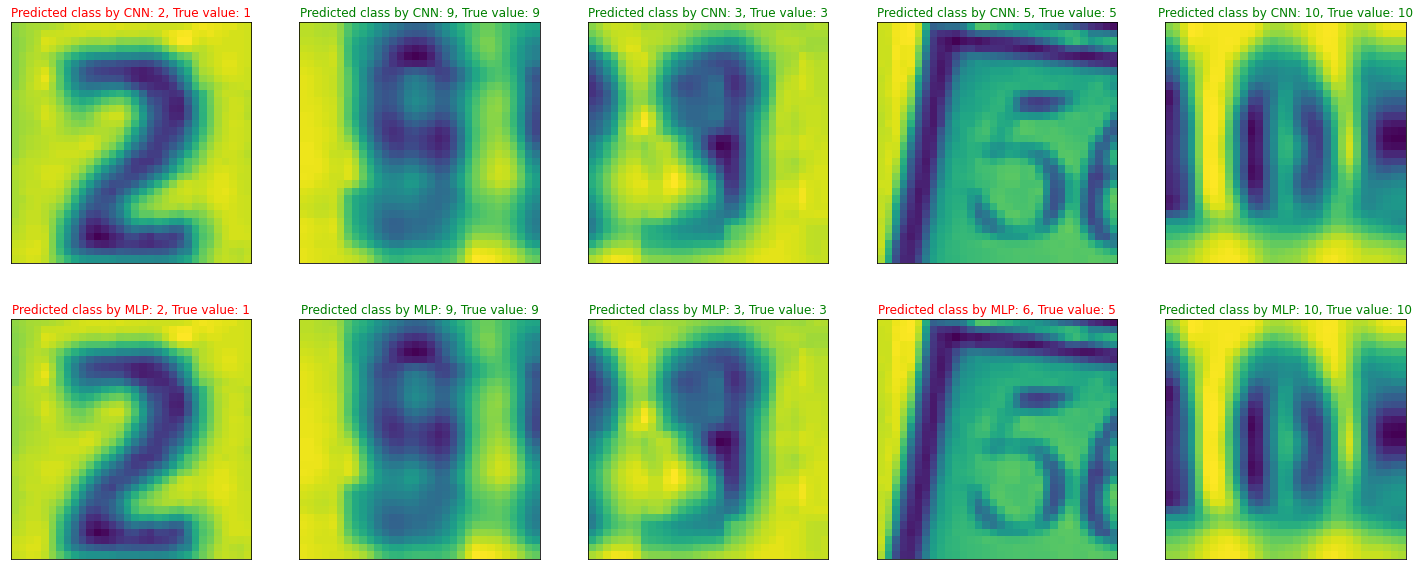

In [28]:
random_img_numbers = np.random.randint(0, x_test.shape[0], 5)
random_images = x_test[random_img_numbers]

predicted_val_mlp = np.argmax(model_mlp_best.predict(random_images), axis=1)
predicted_val_cnn = np.argmax(model_cnn_best.predict(random_images), axis=1)

true_labels = np.argmax(y_test[random_img_numbers], axis=1)

fig, ax = plt.subplots(2, 5)
fig.set_figheight(10)
fig.set_figwidth(25)

for ind in range(10):

  if ind < 5:
    color = 'green' if predicted_val_cnn[ind] == true_labels[ind] else 'red'
    ax[0, ind].imshow(random_images[ind][:,:,0])
    ax[0, ind].axes.xaxis.set_visible(False)
    ax[0, ind].axes.yaxis.set_visible(False)
    ax[0, ind].set_title(f'Predicted class by CNN: {predicted_val_cnn[ind]}, True value: {true_labels[ind]}', color=color)
  else:
    color = 'green' if predicted_val_mlp[ind-5] == true_labels[ind-5] else 'red'
    ax[1, ind-5].imshow(random_images[ind-5][:,:,0])
    ax[1, ind-5].axes.xaxis.set_visible(False)
    ax[1, ind-5].axes.yaxis.set_visible(False)
    ax[1, ind-5].set_title(f'Predicted class by MLP: {predicted_val_mlp[ind-5]}, True value: {true_labels[ind-5]}', color=color)


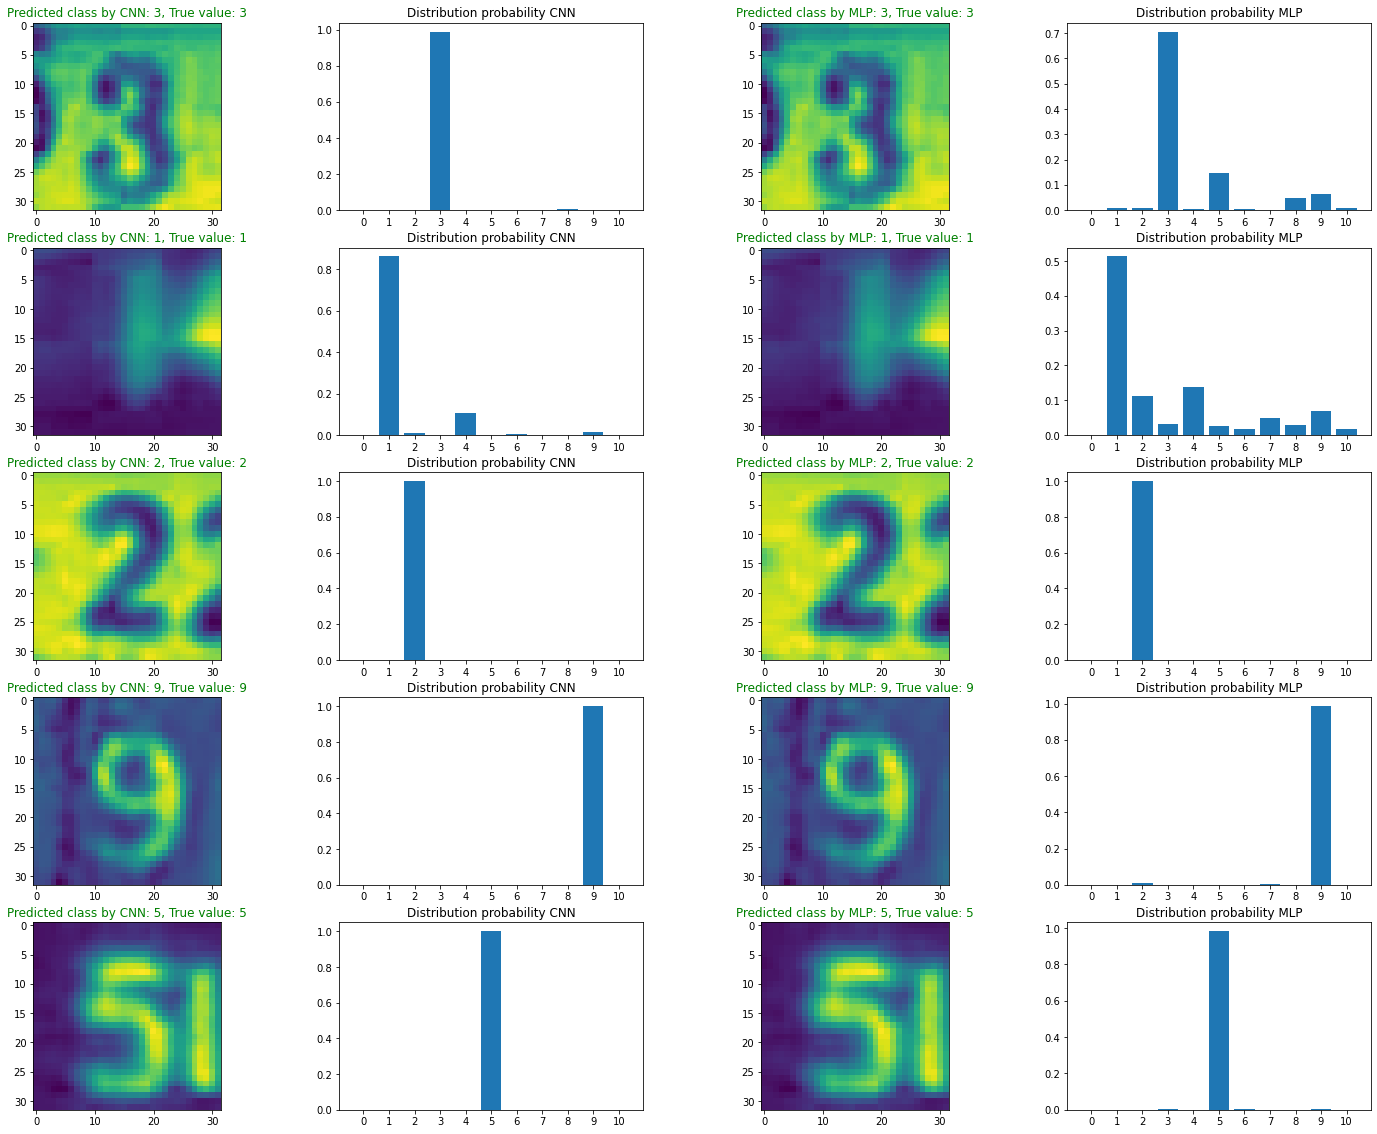

In [29]:
random_img_numbers = np.random.randint(0, x_test.shape[0], 5)
random_images = x_test[random_img_numbers]

predicted_probability_mlp = model_mlp_best.predict(random_images)
predicted_probability_cnn = model_cnn_best.predict(random_images)

true_labels = y_test[random_img_numbers]

fig, ax = plt.subplots(5, 4)
fig.set_figheight(20)
fig.set_figwidth(25)

classes = [str(i) for i in range(0, 11)]

for ind in range(5):

    color = 'green' if np.argmax(predicted_probability_cnn[ind]) == np.argmax(true_labels[ind]) else 'red'

    ax[ind, 0].imshow(random_images[ind][:,:,0])
    ax[ind, 0].set_title(f'Predicted class by CNN: {np.argmax(predicted_probability_cnn[ind])}, True value: {np.argmax(true_labels[ind])}', color=color)
    ax[ind, 1].bar(height=predicted_probability_cnn[ind], x=classes)
    ax[ind, 1].set_title('Distribution probability CNN')
    

    color = 'green' if np.argmax(predicted_probability_mlp[ind]) == np.argmax(true_labels[ind]) else 'red'

    ax[ind, 2].imshow(random_images[ind][:,:,0])
    ax[ind, 2].set_title(f'Predicted class by MLP: {np.argmax(predicted_probability_mlp[ind])}, True value: {np.argmax(true_labels[ind])}', color=color)
    ax[ind, 3].bar(height=predicted_probability_mlp[ind], x=classes)
    ax[ind, 3].set_title('Distribution probability MLP')
    
    


In [30]:
! rm -r model_checkpoint_cnn/
! rm -r model_checkpoint_mlp/